In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

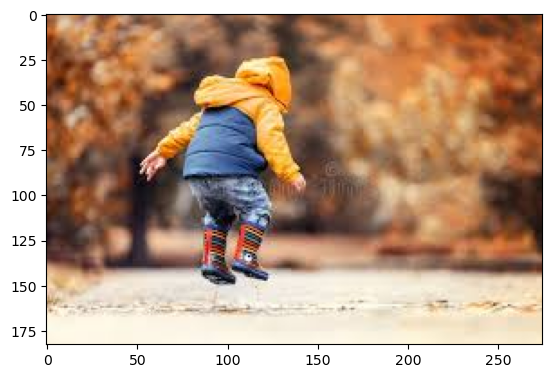

In [67]:
filename="boy.jpg"
img=read_file(filename)
org_img=np.copy(img)

# Create edge mark

In [68]:
def edge_mask(img,line_size,blur_value):
    #input:input image
    #output:edges of images
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

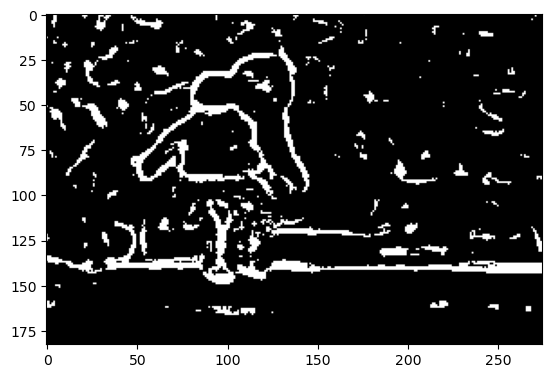

In [69]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

# Reduced Color Palette

In [70]:
def color_quantization(img, k):
    data = img.reshape((-1,3)).astype(np.float32)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result


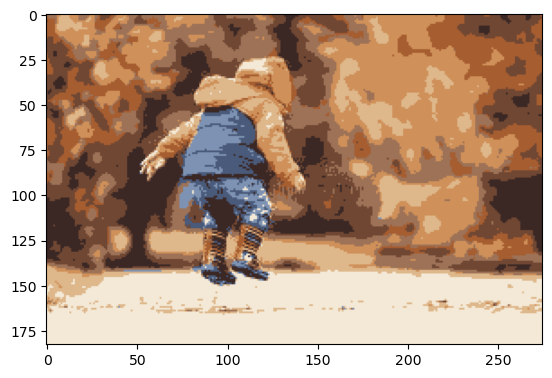

In [71]:
img= color_quantization(img, k=9)
plt.imshow(img)
plt.show()


# Combined edge mask with the quantize img

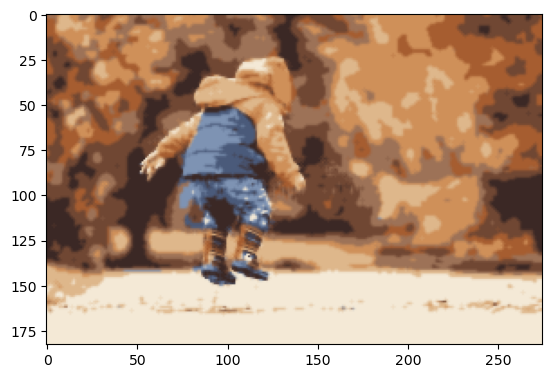

In [72]:
#reduce the noice
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

# combine edge mask with the quantize img

In [73]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.title("cartoon img")
    plt.show()
    plt.imshow(org_img)
    plt.title("original img")
    plt.show() 

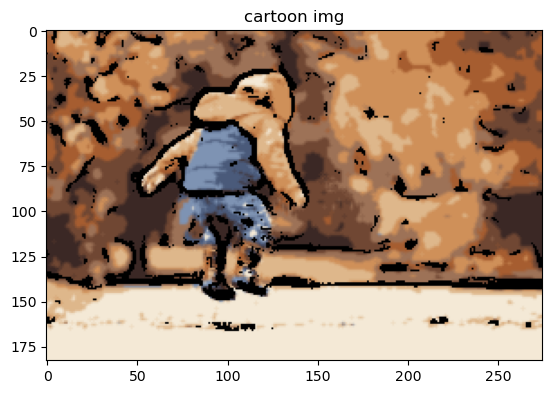

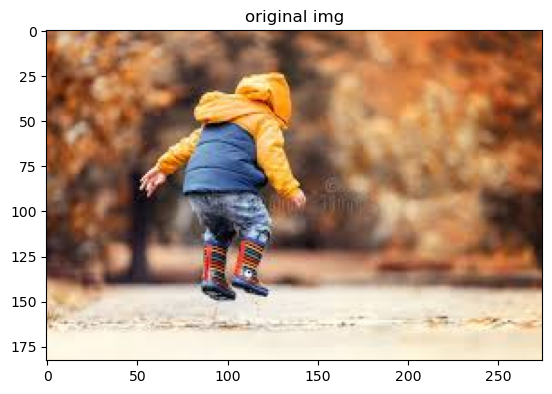

In [74]:
cartoon()